In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# EDA

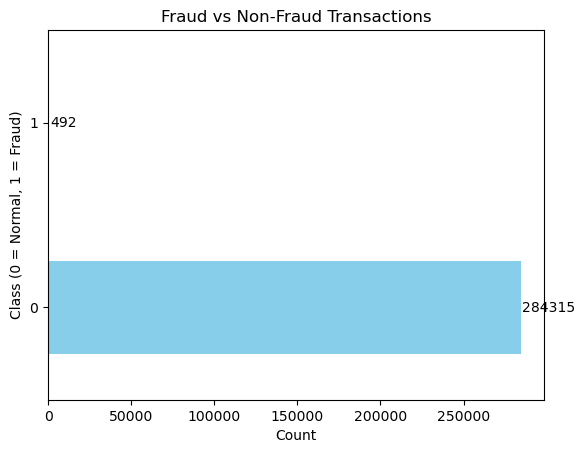

In [7]:
counts = df["Class"].value_counts()
ax = counts.plot(kind="barh", color=["skyblue", "salmon"])
plt.xlabel("Count")
plt.ylabel("Class (0 = Normal, 1 = Fraud)")
plt.title("Fraud vs Non-Fraud Transactions")

for i, v in enumerate(counts):
    plt.text(v + 1000, i, str(v), va='center')

plt.show()


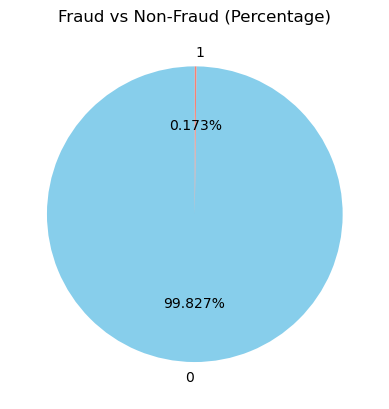

In [8]:
counts = df["Class"].value_counts()
counts.plot(kind="pie", autopct="%.3f%%", colors=["skyblue", "salmon"], startangle=90)
plt.ylabel("")
plt.title("Fraud vs Non-Fraud (Percentage)")
plt.show()


**classic class imbalance problem in this dataset— the fraud (Class = 1) count (~492) is so tiny compared to normal (Class = 0, ~284,000) t**


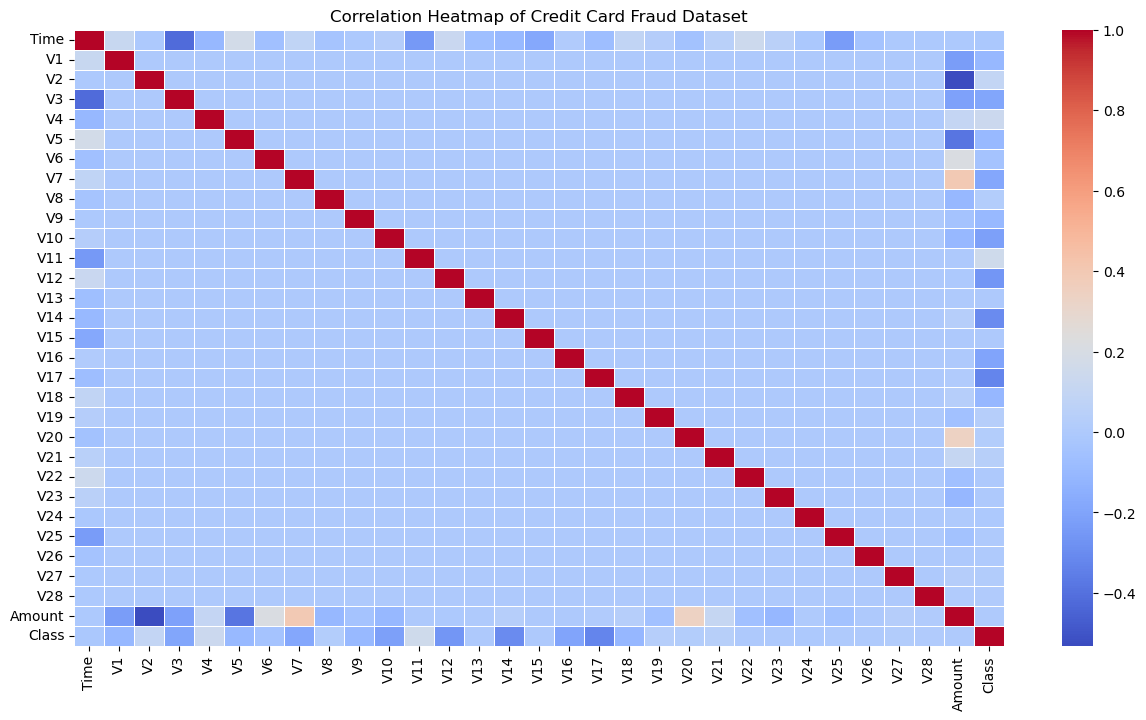

In [9]:
corr = df.corr()


plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Credit Card Fraud Dataset")
plt.show()

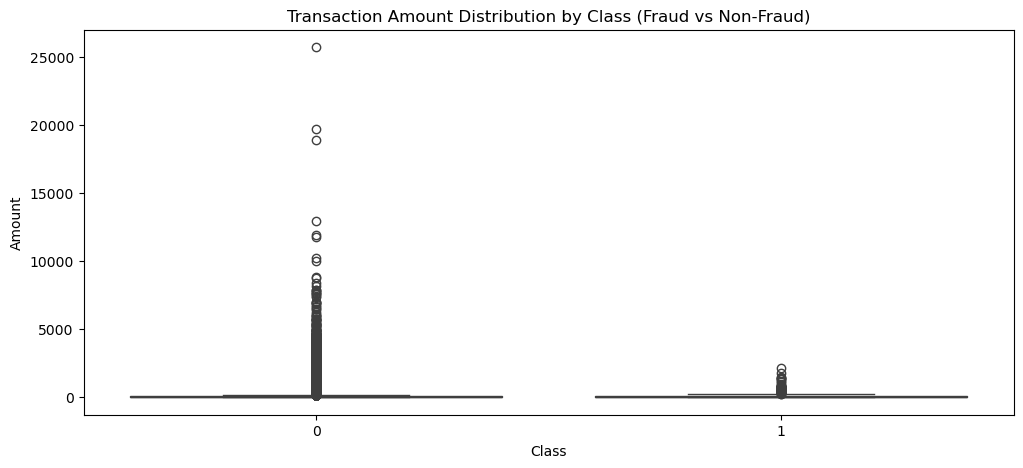

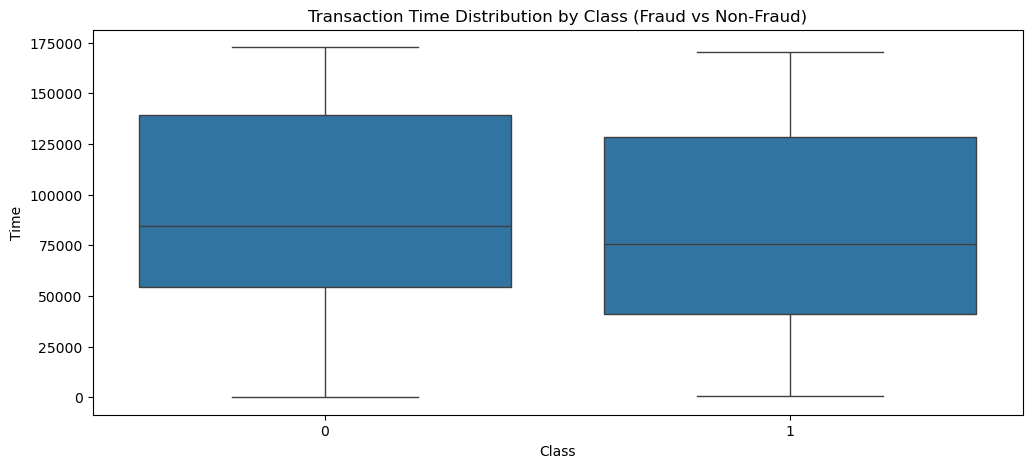

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount Distribution by Class (Fraud vs Non-Fraud)")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x="Class", y="Time", data=df)
plt.title("Transaction Time Distribution by Class (Fraud vs Non-Fraud)")
plt.show()

- Fraudulent transactions (Class=1) are often small amounts.

- Fraud may occur more frequently at specific times of day.

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Train Test Split

In [4]:
X=df.drop(columns=["Class"])
y=df[["Class"]]

In [5]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# DecisionTree Model 

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [23]:
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
    "class_weight": [None, "balanced"]
}

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=25,          
    scoring="roc_auc",  
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, 10, None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='roc_auc', verbose=2)

- max_depth → depth of tree

- min_samples_split → min samples to split a node

- min_samples_leaf → min samples at leaf

- criterion → splitting measure (gini or entropy)

- class_weight → handle imbalance

In [24]:
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)

# Retrain final model with best params on full training data
best_dt = random_search.best_estimator_
best_dt.fit(X_train, y_train)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'entropy', 'class_weight': None}
Best ROC-AUC Score: 0.9435420560946599


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10,
                       random_state=42)

In [28]:
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC-AUC: 0.9612204881249067
[[56850    14]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Small parameter grid for speed
param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"]
}

# Randomized Search (fast)
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,         # only 5 random combos
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
random_search_rf.fit(X_train, y_train)

# Best model
best_rf = random_search_rf.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Params:", random_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': 'balanced'}
Accuracy: 0.9994908886626171
ROC-AUC: 0.9864206972884821
Confusion Matrix:
 [[56852    12]
 [   17    81]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



- n_estimators: number of trees (100–500 is common)

- max_depth: depth of each tree (None = full depth, but risk of overfit)

- min_samples_split: min samples to split a node

- min_samples_leaf: min samples at a leaf node

- max_features: number of features considered at each split ("sqrt", "log2", or float fraction)

- class_weight: handle imbalance ("balanced" is important here)

# XG BOOST

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Baseline XGBoost with smart defaults
xgb_baseline = XGBClassifier(
    n_estimators=200,       # number of trees
    max_depth=5,            # limit depth → prevent overfitting
    learning_rate=0.1,      # step size shrinkage
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    scale_pos_weight=10,    # handles imbalance (adjust if needed)
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Train
xgb_baseline.fit(X_train, y_train)

# Predict
y_pred = xgb_baseline.predict(X_test)
y_pred_proba = xgb_baseline.predict_proba(X_test)[:, 1]

# Evaluate
print("Baseline XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Baseline XGBoost Results:
Accuracy: 0.9996664442961974
ROC-AUC: 0.9870649124872233

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# XGBoost model
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Smaller parameter grid (to keep it fast)
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, 10, 50]  # helps with imbalance
}

# RandomizedSearchCV for faster tuning
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,        # only 20 random combos → fast
    scoring="roc_auc",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search_xgb.fit(X_train, y_train)

# Best params and CV ROC-AUC
print("Best Params:", random_search_xgb.best_params_)
print("Best ROC-AUC (CV):", random_search_xgb.best_score_)

# Predict
y_pred = random_search_xgb.predict(X_test)
y_pred_proba = random_search_xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best ROC-AUC (CV): 0.9831751869507858
Accuracy: 0.9996137776061234
ROC-AUC: 0.9855103619951077

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



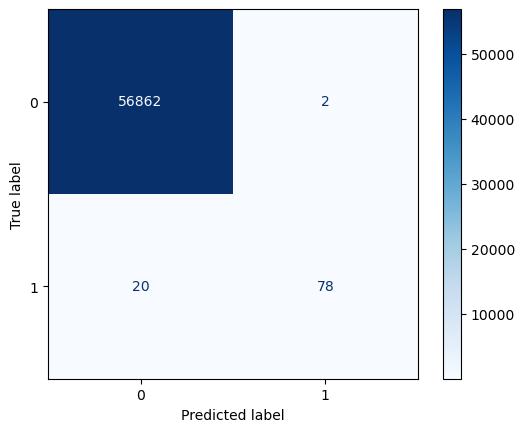

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.show()


TN (True Negatives) = 56,862 → correctly predicted non-frauds.

FP (False Positives) = 2 → predicted fraud when it wasn’t.

FN (False Negatives) = 20 → missed frauds (predicted as non-fraud).

TP (True Positives) = 78 → correctly caught frauds.

**What this means**

Accuracy is 99.9% (expected, since class 0 dominates).

Recall for fraud (class 1) = TP / (TP+FN) = 78 / (78+20) ≈ 0.796 → ~80%.

Precision for fraud (class 1) = TP / (TP+FP) = 78 / (78+2) = 0.975 → ~98%